# Lecture 6

**Authors:**
* Niklas Becker
* Yilber Fabian Bautista 
* 

**Last date of modification:**
 December 25th 2021

Hello there,

welcome to Lecture 6 of this mini-lecture series on programing with Python. In this series, you will learn basic and intermediate python tools that will be of great use in your scientific carer.

By the end of this lecture you will be able to:
* Understand the concept of  **namespaces**, and differentiate the  4 different **namespaces** in python
* Understand the meaning of  **Scope**  of a code 
* Use **classes** to efficiently organize a code
* Differentiate between **class variables and instances variables**
* Use **inheritance** to define **classes** from other existing **classes**

## Namespaces

Formally, a **namespace** is a mapping from names to objects. When you type the name of a function or variable, the python interpreter has to map that string to the corresponding object. Depending on the **namespace**, the same name can lead to different objects. For example, there is the **namespace** of built-in functions, such as `abs()` and `max()`. There is also a **namespace** for included libraries, and one for each function invocation.
Some examples of the same name being resolved differently depending on the **namespace**:
For instance,  although the `abs()` and `np.abs()` functions have the same effect on numbers, they belong to two different **namespaces**.  If we run the lines
```py
import numpy as np

print(abs(-1))       # This is the python built-in absolute value function
print(np.abs(-1))    # This is the abs function from the numpy library 
print(np.abs == abs)

```
we will get the  output
```py
1
1
False
```
That is, the functions do effectively the same, but correspond  different implementations in python, as seen from the last line in the output.  There is no relation between names in different **namespaces**! You can have two functions with the same name but in different **namespaces** do completely different things.


In [1]:
#Try it yourself


There are 4 types of **namespaces**:
- Built-In
- Global
- Enclosing
- Local

When the execution encounters a **name**, the **namespaces** are searched from **bottom to top** in this list until a name can be resolved.

#### Built-in
The first type of namespace was already shown in the example above. There are built-in functions that are available at all times. To see them in a list, run the following line
```py
dir(__builtins__)
```


In [2]:
# try it yourself


#### Global
The global **namespace** is created at the start of any program and contains all names defined at the level of the main program. This is where the user can come in and define **variables** and **functions**. For example:

In [3]:
def max(a, b):
    return "moritz"

print(max(5, 10)) 

moritz


Although the defined function has the same name as the **built-in**  `max` function, our definition is in the **global namespace** and as already mentioned, it  is found before than the  the  Built-in `max` function in the **Built-in  namespace** 

The interpreter also creates **namespaces** for all modules that are imported, such as **numpy** in the example above. 
When importing modules, the names can  be made available at the global **namespace** of the program using the syntax
```py
from  library import function 
```
For instance, if we import the `max` function from **numpy** as

```py
from numpy import max
```
and run 
```max([5, 10])
```
we will get as output `10`, whereas `max(5, 10)`, defined above, will fail. The reason for this is that although the two functions are  defined in the **global namestace**,  the interpreter searches the more resent definition of the function.

In [4]:
# Try it yourself

#### Local and Enclosing
Every function has its own **namespace** associated with it. The **local namespace** is created when the function is executed and 'forgotten' afterwards. 

In [5]:
def foo():
    a = 5 #creates a new variable in the local namespace of foo
    b = 6 #creates a new variable in the local namespace of foo
    
    def bar():
        a = 10   # creates a new variable in the local namespace of bar
        print('local bar a:',a) # finds the a from the local namespace and not the enclosing
        print('enclosing b:',b) # find the b from the enclosing namespace
    
    bar()
    print('local foo a:',a)
    print('local foo b:',b)

foo()
#print(a) would fail

local bar a: 10
enclosing b: 6
local foo a: 5
local foo b: 6


Here, `bar` is defined inside of `foo`, so `foo` is the **enclosing namespace** for `bar`. A name lookup will first search the local **namespace**, then the enclosing **namespace**, then the **global**, and finally the **built-in** one, as mentioned above.

### Scope
The **scope** of a name refers to the region of a code where it has meaning, where it can be associated with the object. Once a variable is out of scope, it is forgotten and no longer accessible.
```py
def foo():
    c = 5 # c is defined
    def bar():
        print(c)  
    bar()  
    print(c)  # until here 'c' has meaning

foo()
print(c)   # outside of the scope of c
```

In [6]:
# Try it yourself

The above discussion show the importance of  to understanding  the concepts of **namespace** and **scope**, in order to have a full control, and understand the functionality  of your code!

## Classes
### What is a class?
A class is a 'blueprint' for creating objects that binds together data (variables) and manipulation of such data (via *methods*). Classes are useful ways of organizing the code, in addition to provide with objects that can be reused. 
### Class Definition
A class is defined using the following syntax:

```py
class MyClass:
    classVariable = 
    def classMethod(self):
        
```
A class can have variables and methods (functions) associated to them. These are collectively called **attributes** of the class. The class definition must be executed before they can be used. The class defines its own **namespace**. It needs to be accessed  with the syntax such as

```py
MyClass.classVariable
MyClass.classMethod()
```

Let us define an specific example of a class

In [7]:
class MyClass():
    classVariable = "This is a class variable"
    
    def classMethod(self):
        return "Hello Class World"

In [8]:
print(MyClass().classVariable)
print(MyClass().classMethod())

This is a class variable
Hello Class World


### Class Instances
In order to use a class **attributes**, one has to specify the entries of the class, and it is cumbersome to do it all the time we want to use the class. For that reason, one can  create  **instances** of a class. An **instance**  of a class is created  with the following function notation:
```py
my_instance = MyClass()
```
This object now has the methods and variables associated with that class
```py
print( classInstance.classMethod() )
print( MyClass.classMethod(classInstance) )
```
Classes can access their own methods and variables using the **self** keyword. **self** represents the instance of the class. By using the **self** keyword we can access the attributes and methods of the class in python. It binds the attributes with the given arguments. These **attributes** can also be accessed from the outside

In [9]:
#try it yourself

#### Instance Variables
Every instance of a class can also have their own variables - **instance variables** - associated to them. They are created similar to local variables and only associated with that instance. Consider the following example of a class

```py
class MyClass:
    classVariable = "This is a class variable"
    def startCounter(self):
        self.counter = 0
        b = 10
    
    def increaseCounter(self):
        self.counter += 1

classInstance = MyClass()    # creates an instance of MyClass

```
If we want to access  `classVariable` from `classInstance`, we simply do `classInstance.classVariable`, which will have as output the string ` "This is a class variable"`. We might wonder whether the variables `counter` and  `b` defined inside the **method** `startCounter()` can be accessed in the same way. If we did `classInstance.counter` we will get the error: 
```py
AttributeError: 'MyClass' object has no attribute 'counter'
```
similar if we typed  `classInstance.b`. To access those  variables we first need to initialize the `startCounter()` method. 

```py
classInstance.startCounter() # This function creates the counter variable of the instance
print(classInstance.counter) # now it can be accessed from the outside
```
where now the output will be `0`. We might wonder whether the same procedure is true to access the value for the `b` variable. If we did 
```py
classInstance.startCounter() # This function creates the counter variable of the instance
print(classInstance.b) 
```
the  output  will be the error  message

```py
AttributeError: 'MyClass' object has no attribute 'b'
```
The reason for this error is that unlike `counter`, `b` is not an **instance variable**. We leaned then that  instance variable are defined with the *self* keyword. Here `b`  corresponds to a local variable inside the `startCounter` method. 

Now, if we initialize the second method `increaseCounter`

```py
classInstance.increaseCounter()
print(classInstance.counter)
```
we will see that  `counter` is still an instance variable but has increased its value by one. 

In [10]:
#Try it yourself

Of course, these instance variables can differ between instances. We can see this in the following example:

In [11]:
class MyClass:    
    def startCounter(self):
        self.counter = 0
    
    def increaseCounter(self):
        self.counter += 1

        
# Create a class instance
classInstance_1 = MyClass() 

# Start its counter
classInstance_1.startCounter() 
print(classInstance_1.counter)

# Increase the counter
classInstance_1.increaseCounter() 
print(classInstance_1.counter)

# Creates a second instance, unrelated to the first
classInstance_2 = MyClass()

# and starts its own counter
classInstance_2.startCounter() 
print(classInstance_2.counter) 

# Increase its counter
classInstance_2.increaseCounter()
print(classInstance_2.counter)

# Check that the  counter of the original instance was NOT affected
print(classInstance_1.counter)     

0
1
0
1
1


### Initialization
The most important instance variables are usually assigned on initialization. For this purpose, there is a special function for classes, the *\__init\__*(self,...) function. The *\__init\__*(self,...) function is called when the instance is first created. The *\__init\__* function is called the **constructor** and can take a list of parameters that need to be passed on during initialization.

As an example, let us imagine we want to create a **class** that has the profile information of a given person. We start by assigning the name of that person to the profile

In [12]:
class Person:
    def __init__(self, name, age):
        self.name = name 
        self.age = age
    
    def call(self):
        print("Hey " + self.name)

bill = Person("Michael", 53)
janet = Person("Janet", 35)

bill.call()
janet.call()

Hey Michael
Hey Janet


### Class Variable vs Instance Variable
Care must be taken to differentiate between class variables and instance variables. Class variables are copied on each initialization  of a class, while instance variables are created from scratch. This can have unintended effects for mutable variables, because their copies are *shallow*, i.e. they are copied by reference. To see this, let us continue with the class of our previous example, and add a `hobbies list` to our person profile as a **class variable**

In [13]:
class Person:
    hobbies = []   # here, hobbies is defined as a class variable
    
    def __init__(self, name):
        self.name = name
        
    def addHobby(self, hobby):
        self.hobbies.append(hobby)


michael = Person("Michael")
michael.addHobby("Yoga")

janet = Person("Janet")
janet.addHobby("Marbles")

print(michael.hobbies)
print(janet.hobbies)


['Yoga', 'Marbles']
['Yoga', 'Marbles']


Now, if  the `hobbies list` was assigned as an **instance variable** instead 

In [14]:
class Person:
    
    def __init__(self, name):
        self.name = name
        self.hobbies = []  # declare hobbies as an instance variable instead

    def addHobby(self, hobby):
        self.hobbies.append(hobby)


michael = Person("Michael")
michael.addHobby("Yoga")

janet = Person("Janet")
janet.addHobby("Marbles")

print(michael.hobbies)
print(janet.hobbies)


['Yoga']
['Marbles']


which generates two different outputs. Generally, it is **advisable** to use class variables only for **values that stay constant between all instances** and mostly use instance variables instead.



#### Printing
To simplify output, the classes can define a function that returns a string to represent that object. This is the *\__str\__* function. For instance

```py
class Person:
    def __init__(self, name, age):
        self.name = name      # creates an instance variable
        self.age = age
    
    def __str__(self):
        return self.name + ", " + str(self.age)

chihiro = Person("Chihiro", 10)

print(chihiro)
str(chihiro)
```

### Why use classes?
- Enables encapsulation: Bind together data and code that manipulates the data in the same place
- Brings structure into the code, and allows **real-world mapping**
- Polymorphism -> See bellow

In [15]:
#Try it yourself

# Exercise 1

Make a **class** modeling a car with the attributes `model`, `cost`, `fuel efficiency` (km/liter), `condition`, and `mileage`. The `condition` is supposed to model the status of the car in terms of functionality, which of course diminishes over time. Implement a sensible *\__init\__* function and additional functions:
 - `Drive`: Takes distance and fuel price as an input. The distance is added to the mileage. It also prints an estimate of the fuel cost and adds it to the total cost. The condition of the car deteriorates at a rate of (1%/1000km). If this drops below 0% the car stops working.
 - `Repair`: The car is taken to the garage. The condition is set back to 100% at a cost of 100€/1%. The cost is printed and added to the total cost.
 - `LifetimeCost`: Outputs the mileage and total cost of the car so far
 - Honk: ;)
 
* If you were to buy a new green VMW Imaginaris (cost `20k€`) with a fuel efficiency of `0.05L/km` what would be the approximated cost after driving for `10^5 km`?
 
* And for the newer version VMW Imaginaris^2 for 25k€ with 0.04L/km?

In [16]:
# Use the followng skeleton:

class Car:
    
    def __init__(self, model, cost, fuel_efficiency, condition=1., mileage=0.):
        pass 
    
    def drive(self, distance, fuel_price):
        pass
        
    def repair(self):
        pass

    def lifetimeCost(self):
        pass

ToyotaIm = Car("VMW Imaginaris", 2e4, 0.05)
ToyotaIm.drive(1e5, 2)
ToyotaIm.repair()
ToyotaIm.lifetimeCost()

### Inheritance
In object-oriented programming, inheritance describes the process of basing a class on another class' implementation, thus **inheriting** its properties. 
* The **child class** inherits all variables and methods from the parent class and can expand on them. Let us see this explicit in the following example

```py
class A:
    text = "This is set in A"
    
    def f(self):
        print(self.text)
    

class B(A):   # This tells python that B inherits from A
    text = "This is set in B"
    
    def g(self):
        print("A new function")

a = A()
a.f()     # calls f in A, which accesses the text variable in A
b = B()
b.f()     # calls f defined in A, but accesses the text variable from B
b.g()     # calls the newly defined function, which would not work for a
```
with output 

```
This is set in A
This is set in B
A new function

```

Thus we see that even thought `f()` is not defined in `class B`, the latter **inherits** the definition from `class A`. Furthermore, the `g()` in `class B`, expands  the methods in `class A`

* The child class can also *override* functions from their parent class:

```py
class A:
    def f(self):
        print("Parent function")
    

class B(A):
    def f(self):
        print("Child function")

a = A()
b = B()

a.f()
b.f()  

A.f(b)        # This calls the function in the parent class for b

```

* The overwritten function can still be accessed from inside the child class using the `super()` function

```py
class A:
    def f(self):
        print("Parent function")
    

class B(A):
    def f(self):
        super().f()    # first, A.f is called 
        print("Child function")  # then new stuff is done


b = B()
b.f()
```
This is especially useful when initializing an object 
```py
class A:
    def __init__(self, text):
        self.text = text
    #...
class B(A):
    def __init__(self, text, moreText):
        super().__init__( text)
        self.moreText = moreText

b = B("abc", "def")
print(b.text, b.moreText)
```


In [17]:
# Try it yourself

### Why use inheritance?
- Code Reusability
- Enables Subtyping (IsA relation): Dog > Mammal > Animal
- Logical Hierarchy
- Use Polymorphism: Calling code is agnostic to the specific implementation

## Example: Dark Matter Halos
In this example we will look at different analytic Dark Matter halo profiles. Since they all share the same idea of describing the density and mass profile of a halo, it makes sense to use classes and inheritance features. To this end, we define the abstract basis class DMHalo, which doesn't describe a specific halo, but tells us how what properties a halo class should have.

The 3 profiles we will look at are
1. a constant density profile
\begin{equation}
\rho_{static}(r) = \rho_0
\end{equation}
2. an NFW profile
\begin{equation}
\rho_{NFW}(r) = \frac{\rho_0}{\frac{r}{r_s} (1 + \frac{r}{r_s})^2} 
\end{equation}
3. a NFW profile with a central density spike
\begin{equation}
\rho_{SpikedNFW} = \begin{cases}
               \rho_{spike} \left(\frac{r_{spike}}{r}\right)^{\alpha}, \quad r <= r_{spike} \\
               \rho_{NFW}(r), \quad  r > r_{spike}
            \end{cases}
\end{equation}
with the parameters chosen such that $\rho_{spike} = \rho_{NFW}(r_{spike})$

The constant and NFW profiles can inherit from this base class, and the SpikedNFW profile can inherit from the NFW and modify its density in the appropriate region. 

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# abstract base class for the DM halo
class DMHalo:
    def __init__(self, rho_0):
        self.rho_0 = rho_0
    
    def density(self, r):
        pass
    
    def __str__(self):
        return "DMHalo"
    
    def mass(self, r):
        pass
    
# Constant DM halo class, inhers from the abstract DMHalo
class ConstHalo(DMHalo):
    def __init__(self, rho_0):
        super().__init__(rho_0)
        
    def density(self, r):
        return self.rho_0 * np.ones(np.shape(r))
    
    def __str__(self):
        return "ConstHalo"

# NFW halo
class NFW(DMHalo):
    def __init__(self, rho_0, r_s):
        super().__init__(rho_0)
        self.r_s = r_s
    
    def density(self, r):
        return self.rho_0 / (r/self.r_s) / (1. + r/self.r_s)**2
    
    def __str__(self):
        return "NFW"
    
# Spiked NFW halo class    
class SpikedNFW(NFW):
    def __init__(self, rho_s, r_s, r_spike, alpha):
        super().__init__(rho_s, r_s)
        self.alpha = alpha
        self.r_spike = r_spike
        self.rho_spike = rho_s * r_s/r_spike / (1.+r_spike/r_s)**2
    
    def density(self, r):
        return np.where( r < self.r_spike, \
                           self.rho_spike * (self.r_spike/r)**self.alpha, \
                        super().density(r))

    def __str__(self):
        return "SpikedNFW"

# This is a function that plots the density for any object that has a density attribute
def plotHalo(halo):
    r = np.geomspace(1, 1e5)
    l, = plt.loglog(r, halo.density(r), label=str(halo))
    #plt.loglog(r, halo.mass(r), linestyle='--', color=l.get_c())

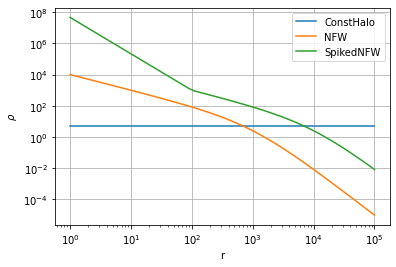

In [19]:
plotHalo(ConstHalo(5.))
plotHalo(NFW(10, 1e3))
plotHalo(SpikedNFW(10., 1e4, 1e2, 7./3.))
plt.xlabel("r"); plt.ylabel(r"$\rho$")
plt.legend(); plt.grid();

# Exercise 2

Implement a mass function inside the classes and plot it alongside the density profile. Recall the mass can be computed as the volume integral of the DM density.

There are two possible approaches to this:

1. Implement the analytical mass function for each class individually
2. Implement a numerical integration scheme in the base class and let inheritance do the rest  (tip: use  solve_ivp)

* What are the pros and cons of each approach?

*  Implement both and compare the results

# Exercise 3

In this exercise we will automatize  Exercise 3 in Lecture 5 for all data present in the `Rotation curves` directory, using classes. As usual, we  will divide the exercise in several steps:


1. Load the pandas, and pyplot libraries; they will be used in your code 
2. Define a new class `rotation_curve`, and initialize it. The initialization function should take the input  `Galaxy_ID`. 

3. In the *\__init\__* function, define the instance variable `df_circular`, which crates a  **DataFrame** for the given `Galaxy_ID` (This corresponds to step 2 in Exercise 3 Tutorial 5).  Create a test class instance of `rotation_curve`, for a given galaxy ID. Check  that for instance, for `Galaxy_ID = 'IC2574'`  the  following lines
```py
test = rotation_curve('IC2574')
test.df_circular.head()
```
produce as output 

![](./Figures/circ_velocity.png "Circular velocity")


4.  Define the class method `uptade_df_circular` which takes as input the variables `key` and `data`. It   adds a new column  `data`, to the **DataFrame** `df_circular`, with keyword  `key`. 

5. Define the class method `add_M_DM`, which will add the column `DM Mass (M_sol)` to   the **DataFrame** `df_circular` (This corresponds to step 3 in Exercise 3, Tutorial 5. Hint, use the `uptade_df_circular` defined above). Check that when you run the lines

```py
test = rotation_curve('IC2574')
test.add_M_DM()
test.df_circular.head()
```
you get as output 

![](./Figures/rot_curve_m.png)

6. Now you can test that the `rotation_curve` class works well with all of the other `Galaxy_IDs` in the  `Rotation curves` directory. (You will probably have troubles loading the data for galaxy `'F563-1'`).

7. We will now proceed to do define a function outside of our class, that plots two columns of  the **DataFrame** `df_circular`, for all of the Galaxy_IDs in the  `Rotation curves` directory. First we need to have a list with all of the `Galaxy_IDs` in the  `Rotation curves` directory. 

* Use the **os** library, and the `os.listdir()` function, to create such a list, and remove `'F563-1'` from the list if you got error message when loading it in step 6.
* Define the function `plot` that takes as entries two keywords `x` and `y`. It will loop over all of the elements of `Galaxy_IDs`, creating an instance of the class `rotation_curve` for every iteration,  and plot the columns `x` vs `y` in  the  `df_circular` class function.  For instance, if you use that function to plot `'radius (kpc)'` vs `'DM Mass (M_sol)'`, one should get a plot similar to:
![](./Figures/M_DM_vs_r.png)

# Solution Exercise 3 (new version. Will be removed from the students version)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

class rotation_curve:
    def __init__(self, Galaxy_ID):
        self.Galaxy_ID = Galaxy_ID
        
        folder_path = 'Rotation curves/'
        self.Galaxy_circular = folder_path+ 'RotationCurve_'+ self.Galaxy_ID + '.csv'
        
        self.df_circular = pd.read_csv(self.Galaxy_circular)
     
    def uptade_df_circular(self,key,data):
        self.df_circular[key] = data
   
    def add_M_DM(self):
        v_c = self.df_circular['circ velocity (km/s)']**2
        r_c = self.df_circular["radius (kpc)"]
        # Newton's constant
        GN = 4.302e-6 # km^2/s^2*kpc/Msol
        #Add DM mass column
        M_DM =  r_c * v_c/GN
        self.uptade_df_circular('DM Mass (M_sol)',M_DM)
        

In [21]:
test = rotation_curve('IC2574')
test.add_M_DM()
test.df_circular.head()

,radius (kpc),circ velocity (km/s),circ velocity error (km/s),DM Mass (M_sol)
0,0.232710,3.33,1.36,5.998368e+05
1,0.465421,8.87,4.32,8.511827e+06
2,0.698131,11.89,4.51,2.294194e+07
3,0.930841,15.76,5.35,5.374246e+07
4,1.163550,18.62,5.54,9.377218e+07


In [22]:
import os
def plot(x = 'radius (kpc)', y = 'DM circ velocity (km/s)'):
    
    ld = os.listdir('Rotation curves/')
    Galaxy_IDs = []
    for i in ld:
        if i.startswith('RotationCurve_baryons_'):
            Galaxy_IDs.append(i[22:-4])
    #loop over all Galaxy IDs
    for galaxy in Galaxy_IDs:
        if galaxy=='F563-1':
            pass
        else:
            #create class instance for a given Galaxy ID
            test = rotation_curve(galaxy)
            # add DM mass column
            test.add_M_DM()
            #define columns to plot
            x_ax = test.df_circular[x]
            y_ax = test.df_circular[y]
            
            #plot
            plt.plot(x_ax,y_ax,label = galaxy)
            #put plot legends outside plot
            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.tight_layout()


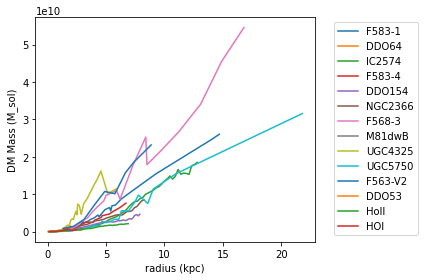

In [23]:
plot(y ='DM Mass (M_sol)' )

# Exercise 3 (old version)

In this exercise, we will automatize  Exercise 3 in Lecture 5, for all data present in the `Rotation curves` directory. It is important that you are very familiar with that exercise.  We will divide the exercise in several steps:

1. Load the pandas,numpy,interp1d and pyplot libraries. they will be used in the code 
2. Define a new class `rotation_curve`, and initialize it. The initialization function should take the input  `Galaxy_ID`. 
3. In the *\__init\__* define the instance variables `df_circular` and `df_baryon`, which crate the   **DataFrame** for the given `Galaxy_ID` (This corresponds to step 2 in Exercise 3 Tutorial 5).  Create a test instance of `rotation_curve`, for a given galaxy id. Check that when running the following lines
```py
test = rotation_curve('IC2574')
test.df_circular.head()
test.df_baryon.head()
```
you get as output 

![](./Figures/circ_velocity.png "Circular velocity")


![](./Figures/cir_vel_baryon.png "Baryonic circular velocity")

4.  Define the class method `uptade_df_circular` which takes as input the variables `key` and `data`, and  adds the new column  `data` to the **DataFrame** `df_circular`, with keyword  `key`. 
5. Define the class method `add_baryon_vel`. This will add the two columns `stars circ velocity (km/s)` and `gas circ velocity (km/s)` to the **DataFrame** `df_circular` (This corresponds to steps 3 and 4 in Exercise 3 Tutorial 5. Hint, use the `uptade_df_circular` defined above). Check that when running the lines 

```py
test = rotation_curve('IC2574')
test.add_baryon_vel()
test.df_circular.head()
``` 
you get as output 

![](./Figures/step_4.png)

6. Define the class method `add_syst_error`, which will add the columns systematic error `syst_error` and total error `total_error` to  the **DataFrame** `df_circular` (This corresponds to step 5 in Exercise 3 Tutorial 5. Hint, use the `uptade_df_circular` defined above). Check that when running the lines

```py
test = rotation_curve('IC2574')
test.add_baryon_vel()
test.add_syst_error()
test.df_circular.head()
``` 
you get as output 
![](./Figures/step_5.png)

7. Define the class method `add_DM_vel_and_M_DM`, which will add the  columns  Dark Matter velocity `DM circ velocity (km/s)` and DM mass `DM Mass (M_sol)` to   the **DataFrame** `df_circular` (This corresponds to step 6 in Exercise 3 Tutorial 5. Hint, use the `uptade_df_circular` defined above). Check that when you run the lines

```py
test = rotation_curve('IC2574')
test.add_baryon_vel()
test.add_syst_error()
test.add_DM_vel_and_M_DM()
test.df_circular.head()
``` 
you get as output 
![](./Figures/step_6.png)

 
8. Now you can test that the `rotation_curve` class works well with all of the other `Galaxy_IDs` in the  `Rotation curves` directory. (You will probably have troubles loading the data for galaxy `'F563-1'`). We will now proceed to do define a function outside of our class, that plots two columns of  the **DataFrame** `df_circular`, for all of the Galaxy_IDs in the  `Rotation curves` directory. First we need to have a list with all of the `Galaxy_IDs`. Use the **os** library, and the `os.listdir()` function, to create such a list (See for instance [here](https://www.geeksforgeeks.org/python-os-listdir-method/)). Then, define the function `plot` that takes as entries two keywords `x` and `y`. It will loop over all of the elements in the list `Galaxy_IDs`, creating an instance of the class `rotation_curve` for every `Galaxy_ID`,  and plot the columns `x` vs `y` in  the **DataFrame** `df_circular`.  For instance, if you use that function to plot `'radius (kpc)'` vs `'DM circ velocity (km/s)'`, one should get a plot similar to:
![](./Figures/vel_DM_vs_r.png)

and similar if you plot the DM mass as function of the radial distance

![](./Figures/M_DM_vs_r.png)


# Solution Exercise 3 old version (will be removed for the  student's version)

In [24]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d # For 1-D interpolations
import matplotlib.pyplot as plt

class rotation_curve:
    def __init__(self, Galaxy_ID):
        self.Galaxy_ID = Galaxy_ID
        
        folder_path = 'Rotation curves/'
        self.Galaxy_circular = folder_path+ 'RotationCurve_'+ self.Galaxy_ID + '.csv'
        self.Galaxy_baryon = folder_path+ 'RotationCurve_baryons_'+ self.Galaxy_ID + '.csv' # baryon contribution

        self.df_circular = pd.read_csv(self.Galaxy_circular)
        self.df_baryon = pd.read_csv(self.Galaxy_baryon)
     
    def uptade_df_circular(self,key,data):
        self.df_circular[key] = data
        
    def add_baryon_vel(self):
        
        # Axis grids
        r_baryon = self.df_baryon["radius (kpc)"]
        r_circ = self.df_circular["radius (kpc)"]
        v_star = self.df_baryon["stars circ velocity (km/s)"]
        v_gas = self.df_baryon['gas circ velocity (km/s)']
        
        # Interpolations
        inter_stars_circ_velocity = interp1d(r_baryon,v_star,kind = 'quadratic')
        inter_gas_circ_velocity = interp1d(r_baryon,v_gas,kind = 'quadratic')
                
        self.uptade_df_circular("stars circ velocity (km/s)",inter_stars_circ_velocity(r_circ)) 
        self.uptade_df_circular("gas circ velocity (km/s)",inter_gas_circ_velocity(r_circ)) 

        
    def add_syst_error(self):
        
        data_circ_error = self.df_circular ['circ velocity error (km/s)']
        
        data_sys_error =  0.05* data_circ_error.iloc[-1]
        self.uptade_df_circular('syst_error',data_sys_error)
        
        data_tot_error = np.sqrt(data_sys_error**2 + data_circ_error**2)
        self.uptade_df_circular('total_error',data_tot_error)
        #return self.df_circular
    def add_DM_vel_and_M_DM(self):
        
        vel_s = np.array([])
        v_s_c = self.df_circular['circ velocity (km/s)']**2
        v_s_star = self.df_circular['stars circ velocity (km/s)']**2
        v_s_gas = self.df_circular['gas circ velocity (km/s)']**2

        for i in range(len(self.df_circular)):
            test = v_s_c[i] - v_s_star[i]-v_s_gas[i]

            if test <0:
                new_test = v_s_c[i] - v_s_star[i] + v_s_gas[i]
                vel_s = np.append(vel_s,new_test)

            else:
                vel_s = np.append(vel_s,test)
        v_DM =  np.sqrt(vel_s) 
        
        self.uptade_df_circular('DM circ velocity (km/s)',v_DM)

        r_circ = self.df_circular["radius (kpc)"]
        # Newton's constant
        GN = 4.302e-6 # km^2/s^2*kpc/Msol
        M_DM =  r_circ * vel_s/GN
        self.uptade_df_circular('DM Mass (M_sol)',M_DM)
        

In [25]:
import os
def plot(x = 'radius (kpc)', y = 'DM circ velocity (km/s)'):
    
    ld = os.listdir('Rotation curves/')
    Galaxy_IDs = []
    for i in ld:
        if i.startswith('RotationCurve_baryons_'):
            Galaxy_IDs.append(i[22:-4])
    
    for galaxy in Galaxy_IDs:
        if galaxy=='F563-1':
            pass
        else:
            test = rotation_curve(galaxy)
            test.add_baryon_vel()
            test.add_syst_error()
            test.add_DM_vel_and_M_DM()

            x_ax = test.df_circular[x]
            y_ax = test.df_circular[y]

            plt.plot(x_ax,y_ax,label = galaxy)

            plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
            plt.xlabel(x)
            plt.ylabel(y)
            plt.tight_layout()


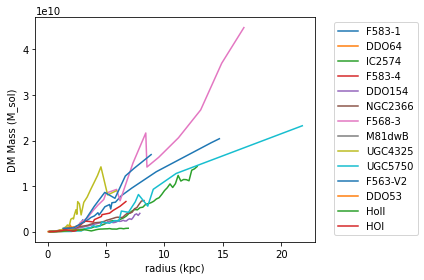

In [26]:
plot(y ='DM Mass (M_sol)' )